# **Algorithms supported in BQML**

BQML에서 지원되는 알고리즘을 구분화 해보면, 아래와 같다. 

BQML은 다음과 같은 카테고리의 알고리즘을 지원합니다.

1. 분류(Classification): 텍스트, 이미지, 숫자 데이터와 같은 다양한 데이터 유형을 사용하여 객체를 분류하는 알고리즘입니다. 예를 들어, 텍스트 데이터를 사용하여 이메일이 스팸인지 정상인지 분류하거나, 이미지 데이터를 사용하여 개와 고양이를 구분하는 데 사용할 수 있습니다.
  - 로지스틱 회귀(Logistic Regression): 이진 분류 문제에 사용되는 가장 기본적인 분류 알고리즘입니다.
  - 선형 회귀(Linear Regression): 선형 회귀 모델은 주어진 데이터 포인트와 가장 잘 맞는 선을 찾으려고 합니다. 이 선은 데이터 포인트와 모델 예측 값 간의 오차를 최소화하려고 노력합니다.
  - 랜덤 포레스트(Random Forest): 다중 분류 문제에 잘 작동하는 앙상블 분류 알고리즘입니다.
  - XGBoost(eXtreme Gradient Boosting): 랜덤 포레스트와 유사한 앙상블 분류 알고리즘이지만 더 빠르고 정확합니다.
  - 기타 Wide & Deep, AutoML, DNN

2. 회귀(Regression): 숫자 데이터를 사용하여 값을 예측하는 알고리즘입니다. 예를 들어, 과거 판매 데이터를 사용하여 미래의 판매량을 예측하거나, 기상 데이터를 사용하여 다음 날의 기온을 예측하는 데 사용할 수 있습니다.
  - 선형 회귀(Linear Regression): 가장 기본적인 회귀 알고리즘입니다.
  - 다중 회귀(Multiple Regression): 여러 개의 입력 변수를 사용하여 값을 예측하는 알고리즘입니다.
  - 로지스틱 회귀(Logistic Regression): 분류 문제에도 사용할 수 있는 회귀 알고리즘입니다.

3. 군집화(Clustering): 유사한 데이터 포인트를 그룹으로 묶는 알고리즘입니다. 예를 들어, 고객 데이터를 사용하여 고객을 세분화하거나, 이미지 데이터를 사용하여 이미지를 유사한 그룹으로 묶는 데 사용할 수 있습니다.
  - 군집화평균(K-Means): 가장 기본적인 군집 알고리즘입니다.

4. 시계열 : 시계열 알고리즘
  - Arima : 단일 시계열 데이터의 자기회귀, 차분, 이동평균을 사용하여 미래의 데이터를 예측하는 알고리즘입니다
  - Arima external : 다변량 시계열 데이터의 자기회귀, 차분, 이동평균을 사용하여 미래의 데이터를 예측하는 알고리즘입니다. 

5. 컴퓨터 비전(Computer Vision): 이미지 데이터를 이해하고 처리하는 알고리즘입니다. 예를 들어, 이미지에서 물체를 인식하거나, 이미지의 특성을 분석하거나, 이미지를 생성하는 데 사용할 수 있습니다.
  - 이미지 분류(Image Classification): 이미지의 내용을 식별하는 알고리즘입니다.
  - 이미지 검색(Image Search): 이미지에서 특정 내용을 검색하는 알고리즘입니다.
  - 이미지 인식(Object Detection): 이미지에서 특정 물체를 인식하는 알고리즘입니다.

6. 추천 시스템(Recommendation System): 사용자에게 관심 있을 만한 항목을 추천하는 알고리즘입니다. 예를 들어, 영화를 추천하거나, 음악을 추천하거나, 상품을 추천하는 데 사용할 수 있습니다.
  - 협업 필터링(Collaborative Filtering): 사용자의 과거 행동을 기반으로 추천을 생성하는 알고리즘입니다.
  - 콘텐츠 기반 필터링(Content-Based Filtering): 사용자의 관심사를 기반으로 추천을 생성하는 알고리즘입니다.

BQML은 이러한 알고리즘을 사용하여 다양한 비즈니스 문제를 해결할 수 있습니다

해당 Training 자료는 위에 나온 알고리즘 중 분류/회귀, 군집화 및 시계열 분석을 위주로 수행한다.


In [1]:
# Workbench Instance에서는 기본적으로 설치되어 있다.

#!pip install google-cloud-bigquery
#!pip install pandas
!pip install pandas-gbq --user

**중요 !!**

~public dataset은 대부분, 'US' 리전에서 동작합니다.~

~만약, public dataset으로 테스트를 수행하신다면, dataset을 US로 생성하시기 바랍니다.~ 

**현재 훈련을 위한 데이터셋을 asia-northeast3에 미리 생성하였습니다. 별도의 복사 없이 사용하시면 됩니다.**

자체 데이터셋이 asia-northeast3 (서울)에 존재하고 해당하는 데이터셋을 이용하여 처리하고 싶다면, bigquery client초기화 시점에 default location 정보를 변경하시기 바랍니다. 

**workspace_dataset_name**은 바로 Training / Test Dataset이 들어가는 장소입니다. Unique한 Dataset 이름을 넣어주세요. 본인 Initial을 끝에 붙이는 것도 좋은 방법입니다.

In [2]:
### 하기 내용은 꼭 확인하시기 바랍니다. 데이터셋의 명칭, 위치등을 결정하게 됩니다.

#location='US'
location='asia-northeast3'

# 기존 데이터셋(일반 데이터베이스로 보면, Schema)을 이용한다면, 아래 내용은 실행하지 않으셔도 됩니다. 
# dataset 이 겹칠 수 있으므로, dataset_name 뒤에 본인 initial을 붙여서 생성하는 것도 방법입니다.
# workspace dataset은 훈련데이터, 테스트데이터 테이블을 생성하는 영역입니다.
workspace_dataset_name='trainingset_pkp'

# 실제 훈련에 필요한 데이터셋을 가지고 있습니다. 
ml_dataset_name='ml_datasets'

In [3]:
# Intialize All necessary modules
from google.cloud import bigquery

client = bigquery.Client(location=location)
project_id = client.project

In [4]:
# 기존 데이터셋(일반 데이터베이스로 보면, Schema)을 이용한다면, 아래 내용은 실행하지 않으셔도 됩니다. 
# Unit of table_expiration is millisecond. 3600000 * 24
#! bq --location=$location mk --dataset --default_table_expiration=86400000 $project_id:$dataset_name

In [5]:
## 여기에 Model을 작성하고, 임시 테이블을 생성할 데이터 셋 명칭을 지정한다!!!!

dataset_id = f"{project_id}.{workspace_dataset_name}"
mldataset_id = f"{project_id}.{ml_dataset_name}"

ml_dataset = f'{mldataset_id}.penguins'

## Classification



### 1-1. Census Classification

머신 러닝에서의 일반적인 문제 중 하나는 데이터를 두 가지 유형으로 분류하는 것인데, 이를 레이블이라고 합니다. 예를 들어, 소매업자는 고객이 다른 고객 정보를 기반으로 새로운 제품을 구매할지 예측하려고 할 수 있습니다. 이 경우 두 가지 레이블은 '구매할 것'과 '구매하지 않을 것'일 수 있습니다. 이러한 경우, 하나의 열이 레이블을 나타내도록 데이터 집합을 구성할 수 있습니다. 바이너리 로지스틱 회귀 모델을 훈련하기 위해 사용할 수 있는 데이터에는 고객의 위치, 이전 구매 내역, 고객이 제공한 선호도 등이 포함될 수 있습니다.

이 가이드에서는 BigQuery ML의 바이너리 로지스틱 회귀 모델을 사용하여 미국 인구조사 데이터 세트의 응답자 소득 범위를 예측합니다. 이 데이터 세트에는 2000년과 2010년 미국 거주자의 인구 통계 및 소득 정보가 포함되어 있습니다. 이 데이터에는 고용 상태, 직업 범주, 교육 수준 및 소득 데이터가 포함됩니다.

**목표**
이 가이드에서는 다음 작업을 수행합니다.
로지스틱 회귀 모델을 만듭니다.
로지스틱 회귀 모델을 평가합니다.
로지스틱 회귀 모델을 사용하여 예측합니다.


로지스틱 회귀 모델 만들기는 다음 단계로 구성됩니다.

- 1단계: 모델을 저장할 데이터 세트를 만듭니다.
  - 1단계에서는 모델을 저장할 BigQuery 데이터 세트를 만듭니다.
- 2단계: 데이터를 검사합니다.
  - 이 단계에서는 데이터 세트를 검사하고 로지스틱 회귀 모델의 학습 데이터로 사용할 열을 식별합니다.
- 3단계: 학습 데이터를 선택합니다.
  -다음 단계로 census_adult_income 테이블을 대상으로 쿼리를 실행하여 바이너리 로지스틱 회귀 모델을 학습하는 데 사용할 데이터를 준비합니다. 이 단계에서는 관련 특성을 식별하고 나중에 쿼리를 입력 데이터로 사용할 수 있도록 뷰에 저장합니다.
- 4단계: 로지스틱 회귀 모델을 만듭니다.
  - 이 단계에서는 CREATE MODEL 문을 사용하여 로지스틱 회귀 모델을 만듭니다.
- 5단계: ML.EVALUATE 함수를 사용하여 모델을 평가합니다.
  - 그런 다음 ML.EVALUATE 함수를 사용하여 모델 성능에 대한 통계를 제공합니다.
- 6단계: ML.PREDICT 함수를 사용하여 참여자의 소득을 예측합니다.
  - 마지막으로 ML.PREDICT 함수를 사용하여 특정 인구조사 참가자 집합의 소득 계층을 예측합니다.



### 1-2. Penguin 종 예측

Penguin 자료의 종, 지역, 부리 길이, 부리 높이, 발사이즈, 성별이 주어졌을 때, 몸무게를 알아맞추는 방법이다. 
즉 여기서는 목표가 "
" 컬럼이 되며, 카테고리 값이 Target이 되었으니, **classification** 모델을 이용해 본다.

먼저, Penguin 데이터 셋을 살펴보자

In [6]:
ml_dataset = f'{mldataset_id}.penguins'

In [7]:
df_penguin = client.query(f"""
select *
  from `{ml_dataset}`
""").to_dataframe()

자료를 트레이닝과 검증용으로 구분하여 진행하여야 합니다.

(AutoML을 이용할 경우, 자료 분리, 전처리를 알아서 진행하기 때문에 매우 편하다. 현재 데이터 셋은 어는 정도 정제된 자료라 간단한 xgboost를 이용하여 진행합니다.)


In [8]:
df_penguin.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),Dream,36.6,18.4,184.0,3475.0,FEMALE
1,Adelie Penguin (Pygoscelis adeliae),Dream,39.8,19.1,184.0,4650.0,MALE
2,Adelie Penguin (Pygoscelis adeliae),Dream,40.9,18.9,184.0,3900.0,MALE
3,Chinstrap penguin (Pygoscelis antarctica),Dream,46.5,17.9,192.0,3500.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Dream,37.3,16.8,192.0,3000.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),Dream,43.2,18.5,192.0,4100.0,MALE
6,Chinstrap penguin (Pygoscelis antarctica),Dream,46.9,16.6,192.0,2700.0,FEMALE
7,Chinstrap penguin (Pygoscelis antarctica),Dream,50.5,18.4,200.0,3400.0,FEMALE
8,Chinstrap penguin (Pygoscelis antarctica),Dream,49.5,19.0,200.0,3800.0,MALE
9,Adelie Penguin (Pygoscelis adeliae),Dream,40.2,20.1,200.0,3975.0,MALE


In [9]:
df_penguin.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


table이 작기 때문에, dataframe에 모두 loading되어 있는 상태입니다.

테이블이 큰 경우에는 이를 Dataframe에 모두 loading하고자 할 경우, 시간과 비용이 증가합니다. 이럴 경우에는 되도록 BigQuery에서 SQL을 통해 작업하는 것이 매우 유효하고 적은 비용이 들게 됩니다.
(나중에 BigFrame library이용을 고려해 볼 것)

어떤 방법을 사용하던, BQML을 사용하기 위해서는 최종적으로는 bigquery안에, 훈련/테스트 데이터 셋을 구성하여야 합니다. 

In [10]:
wanna_process_in_bigquery = True

In [11]:
train_table_name = 'penguin_train'
test_table_name = 'penguin_test'

def split_data_in_dataframe(split_ratio):
    df_penguin_shuffled = df_penguin.sample(frac=1.0, random_state=32)
    total_row = len(df_penguin_shuffled)
    split_loc = int(total_row * split_ratio)

    df_penguin_shuffled_train = df_penguin_shuffled[:split_loc]
    df_penguin_shuffled_test = df_penguin_shuffled[split_loc:]
    
    df_penguin_shuffled_train.to_gbq(f'{dataset_id}.{train_table_name}', inplace=True)
    df_penguin_shuffled_test.to_gbq(f'{dataset_id}.{test_table_name}', inplace=True)

def split_data_in_bigquery(split_ratio):
    client.query(f"""create or replace table {dataset_id}.{train_table_name} as
select * from `{ml_dataset}` where rand() < {split_ratio}""").to_dataframe()
    client.query(f"""create or replace table {dataset_id}.{test_table_name} as
select * from `{ml_dataset}`
except distinct
select * from {dataset_id}.{train_table_name}""").to_dataframe()
    
def split_data(split_ratio):
    if wanna_process_in_bigquery:
        split_data_in_bigquery(split_ratio)
    else:
        split_data_in_dataframe(split_ratio)

split_data(0.7)

준비가 다 되었습니다.

training 테이블을 이용하여, 모델을 생성해보도록 하겠습니다.

모델 생성할 때, enable_global_explain 항목을 추가하면, 모델 생성후에, 모델에 대한 설명 지표가 나오기 때문에, 도움이 되기 때문에, 활성하를 수행합니다.(훈련 시간은 증가)

분류 문제이기 때문에, 분류를 펭귄의 "species"으로 두고 보자. 
분류 알고리즘은 빠르고 성능이 좋은 BOOSTED_TREE_CLASSIFIER 로 진행한다.

In [12]:
model_name = 'penguin_classification_model'

model_creation_query = client.query(f"""
create or replace model `{dataset_id}.{model_name}`
options
( model_type='boosted_tree_classifier', input_label_cols=['species'], enable_global_explain=True) 
as
select *
  from `{dataset_id}.{train_table_name}` where body_mass_g is not null""").to_dataframe()

In [13]:
# 호출한 모델이 잘 진행되고 있는지 확인해보자
df_model_training_info = client.query(f"""
select * from ml.training_info(model `{dataset_id}.{model_name}`) order by iteration asc""").to_dataframe()
print(df_model_training_info)

    training_run  iteration      loss  eval_loss  learning_rate  duration_ms
0              0          1  0.722089   0.722089            0.3       132544
1              0          2  0.504516   0.504516            0.3           24
2              0          3  0.362332   0.362332            0.3           31
3              0          4  0.265386   0.265386            0.3           27
4              0          5  0.198078   0.198078            0.3           25
5              0          6  0.150312   0.150312            0.3           24
6              0          7  0.114977   0.114977            0.3           33
7              0          8  0.088070   0.088070            0.3           32
8              0          9  0.068889   0.068889            0.3           24
9              0         10  0.053853   0.053853            0.3        13423
10             0         11  0.043048   0.043048            0.3           20
11             0         12  0.034745   0.034745            0.3           25

duration time 이 변경되지 않는 것을 확인하면 모델 생성이 끝났다는 것을 알 수 있다. 필요하면 아래와 같은 대기 루틴을 만들어서, 모델링이 끝날 때까지 대기할 수 있다.

In [14]:
def wait_for_creating_model():
    prev_duration_ms = 0
    while True:
        df_model_training_info = client.query(f"""select duration_ms from ml.training_info(model `{dataset_id}.{model_name}`) order by iteration asc""").to_dataframe()
        if prev_duration_ms == df_model_training_info.iloc[0][0]:
            prev_duration_ms = df_model_training_info.iloc[0][0]
            sleep(5)
        else:
            return
        
wait_for_creating_model()

모델에 대한 검증을 수행해 보자. 먼저 모델 훈련에서 발생한 모델 평가 항목들을 확인해 보자

In [15]:
client.query(f"""
select *
  from ml.global_explain(model `{dataset_id}.{model_name}`)""").to_dataframe()

,feature,attribution
0,culmen_length_mm,1.210298
1,island,0.720844
2,flipper_length_mm,0.646847
3,culmen_depth_mm,0.401611
4,body_mass_g,0.086018
5,sex,0.001768


In [16]:
# client.query(f"""
# select *
#   from ml.FEATURE_IMPORTANCE(model `{dataset_id}.{model_name}`)""").to_dataframe()
# This feature isn't supported in linear regression.

모델을 이용하여, 테스트 데이터셋에서 추정치를 계산하고, 실제값과 비교해 보자. 

ML_PREDICT는 실제 예상치와 관련된 정보를 제공하고, EXPLAIN_PREDICT 예측치에 대한 설명저보가 추가된다. 

먼저 ML_EXPLAIN_PREDICT를 사용해보자.

In [17]:
client.query(f"""
select * from ML.EXPLAIN_PREDICT(MODEL `{dataset_id}.{model_name}`,(select * from `{dataset_id}.{test_table_name}` where species is not null))""").to_dataframe()

,predicted_species,probability,top_feature_attributions,baseline_prediction_value,prediction_value,approximation_error,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),0.990928,"[{'feature': 'culmen_length_mm', 'attribution'...",0.943142,3.436985,0.0,Adelie Penguin (Pygoscelis adeliae),Torgersen,37.8,17.3,180.0,3700.0,None
1,Adelie Penguin (Pygoscelis adeliae),0.989618,"[{'feature': 'culmen_length_mm', 'attribution'...",0.943142,3.436985,0.0,Adelie Penguin (Pygoscelis adeliae),Torgersen,37.8,17.1,186.0,3300.0,None
2,Gentoo penguin (Pygoscelis papua),0.994488,"[{'feature': 'flipper_length_mm', 'attribution...",0.873685,3.712596,0.0,Gentoo penguin (Pygoscelis papua),Biscoe,44.5,15.7,217.0,4875.0,.
3,Gentoo penguin (Pygoscelis papua),0.994541,"[{'feature': 'flipper_length_mm', 'attribution...",0.873685,3.712596,0.0,Gentoo penguin (Pygoscelis papua),Biscoe,50.8,15.7,226.0,5200.0,MALE
4,Gentoo penguin (Pygoscelis papua),0.994541,"[{'feature': 'flipper_length_mm', 'attribution...",0.873685,3.712596,0.0,Gentoo penguin (Pygoscelis papua),Biscoe,46.2,14.9,221.0,5300.0,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Chinstrap penguin (Pygoscelis antarctica),0.981341,"[{'feature': 'culmen_length_mm', 'attribution'...",-0.323731,3.367939,0.0,Chinstrap penguin (Pygoscelis antarctica),Dream,46.0,18.9,195.0,4150.0,FEMALE
107,Chinstrap penguin (Pygoscelis antarctica),0.993719,"[{'feature': 'culmen_length_mm', 'attribution'...",-0.323731,3.543719,0.0,Chinstrap penguin (Pygoscelis antarctica),Dream,49.8,17.3,198.0,3675.0,FEMALE
108,Chinstrap penguin (Pygoscelis antarctica),0.955616,"[{'feature': 'island', 'attribution': 1.450018...",-0.323731,2.241374,0.0,Chinstrap penguin (Pygoscelis antarctica),Dream,42.5,16.7,187.0,3350.0,FEMALE
109,Chinstrap penguin (Pygoscelis antarctica),0.989642,"[{'feature': 'culmen_length_mm', 'attribution'...",-0.323731,3.543719,0.0,Chinstrap penguin (Pygoscelis antarctica),Dream,47.6,18.3,195.0,3850.0,FEMALE


이후 ML_PREDICT를 사용해보자.


In [18]:
client.query(f"""
select * from ML.PREDICT(MODEL `{dataset_id}.{model_name}`,(select * from `{dataset_id}.{test_table_name}` where body_mass_g is not null))""").to_dataframe()

,predicted_species,predicted_species_probs,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),[{'label': 'Gentoo penguin (Pygoscelis papua)'...,Adelie Penguin (Pygoscelis adeliae),Torgersen,37.8,17.3,180.0,3700.0,None
1,Adelie Penguin (Pygoscelis adeliae),[{'label': 'Gentoo penguin (Pygoscelis papua)'...,Adelie Penguin (Pygoscelis adeliae),Torgersen,37.8,17.1,186.0,3300.0,None
2,Gentoo penguin (Pygoscelis papua),[{'label': 'Gentoo penguin (Pygoscelis papua)'...,Gentoo penguin (Pygoscelis papua),Biscoe,44.5,15.7,217.0,4875.0,.
3,Gentoo penguin (Pygoscelis papua),[{'label': 'Gentoo penguin (Pygoscelis papua)'...,Gentoo penguin (Pygoscelis papua),Biscoe,50.8,15.7,226.0,5200.0,MALE
4,Gentoo penguin (Pygoscelis papua),[{'label': 'Gentoo penguin (Pygoscelis papua)'...,Gentoo penguin (Pygoscelis papua),Biscoe,46.2,14.9,221.0,5300.0,MALE
...,...,...,...,...,...,...,...,...,...
106,Chinstrap penguin (Pygoscelis antarctica),[{'label': 'Gentoo penguin (Pygoscelis papua)'...,Chinstrap penguin (Pygoscelis antarctica),Dream,46.0,18.9,195.0,4150.0,FEMALE
107,Chinstrap penguin (Pygoscelis antarctica),[{'label': 'Gentoo penguin (Pygoscelis papua)'...,Chinstrap penguin (Pygoscelis antarctica),Dream,49.8,17.3,198.0,3675.0,FEMALE
108,Chinstrap penguin (Pygoscelis antarctica),[{'label': 'Gentoo penguin (Pygoscelis papua)'...,Chinstrap penguin (Pygoscelis antarctica),Dream,42.5,16.7,187.0,3350.0,FEMALE
109,Chinstrap penguin (Pygoscelis antarctica),[{'label': 'Gentoo penguin (Pygoscelis papua)'...,Chinstrap penguin (Pygoscelis antarctica),Dream,47.6,18.3,195.0,3850.0,FEMALE


EXPLAIN_PREDICT와 PREDICT 함수차이가 보인다. 

즉 Feature에 대한 attribution 정보가 들어가 있다는 부분이 확실히 다르게 보인다. 


## **Closing**

해당 테이블은 하루가 지나면 자동으로 지워지나, Model의 경우, 명시적인 삭제가 필요하다. 

모델을 삭제하면서 해당 Step을 마무리한다.

In [19]:
client.query(f"""drop model if exists `{dataset_id}.{model_name}`""").to_dataframe()
client.query(f"""drop table if exists `{dataset_id}.{train_table_name}`""").to_dataframe()
client.query(f"""drop table if exists `{dataset_id}.{test_table_name}`""").to_dataframe()

""


### Iris Classification

## **Regression**

### Penguine Weight Prediction

이 튜토리얼에서는 penguin 테이블을 사용하여 펭귄의 종, 사는 섬, 컬멘 길이 및 깊이, 지느러미 길이 및 성별을 기반으로 펭귄의 무게를 예측하는 모델을 만듭니다.

목표
이 튜토리얼에서는 다음을 수행합니다.

BigQuery ML에서 CREATE MODEL 문을 사용하여 선형 회귀 모델 만들기
ML.EVALUATE 함수를 사용하여 ML 모델 평가
ML.PREDICT 함수를 사용하여 ML 모델로 예측


위에서 진행한 Classification과 현재 진행하는 Regression의 차이는 타겟 레이블이, Factor 타입(Discrete)인지, Continous 값 형태인지 따라 구분된다. 

현재 타겟 레이블을 "펭귄 몸무게"로 잡고 진행합니다. 

따라서, 나머지 부분은 동일하고, label만, "body_mass_g" 로 변경하면 됩니다.

In [84]:
ml_dataset = f'{mldataset_id}.penguins'

wanna_process_in_bigquery = True

train_table_name = 'penguin_train'
test_table_name = 'penguin_test'

df_penguin = client.query(f"""
select *
  from `{ml_dataset}`
""").to_dataframe()

def split_data_in_dataframe(split_ratio):
    df_penguin_shuffled = df_penguin.sample(frac=1.0, random_state=32)
    total_row = len(df_penguin_shuffled)
    split_loc = int(total_row * split_ratio)

    df_penguin_shuffled_train = df_penguin_shuffled[:split_loc]
    df_penguin_shuffled_test = df_penguin_shuffled[split_loc:]
    
    df_penguin_shuffled_train.to_gbq(f'{dataset_id}.{train_table_name}', inplace=True)
    df_penguin_shuffled_test.to_gbq(f'{dataset_id}.{test_table_name}', inplace=True)

def split_data_in_bigquery(split_ratio):
    client.query(f"""create or replace table {dataset_id}.{train_table_name} as
select * from `{ml_dataset}` where rand() < {split_ratio}""").to_dataframe()
    client.query(f"""create or replace table {dataset_id}.{test_table_name} as
select * from `{ml_dataset}`
except distinct
select * from {dataset_id}.{train_table_name}""").to_dataframe()
    
def split_data(split_ratio):
    if wanna_process_in_bigquery:
        split_data_in_bigquery(split_ratio)
    else:
        split_data_in_dataframe(split_ratio)

split_data(0.7)


훈련, 테스트용 자료가 준비되었다. 
이제 regression 모델을 생성해보자. 


In [ ]:
model_name = 'penguin_regression_model'
algorithm = 'boosted_tree_regressor'
label_column = 'body_mass_g'

model_creation_query = client.query(f"""
create or replace model `{dataset_id}.{model_name}`
options
( model_type='{algorithm}', input_label_cols=['{label_column}'], enable_global_explain=True) 
as
select *
  from `{dataset_id}.{train_table_name}` where {label_column} is not null""").to_dataframe()


모델이 생성되었다. 

이제 모델 내용을 확인해 보자


In [ ]:
client.query(f"""
select *
  from ml.global_explain(model `{dataset_id}.{model_name}`)""").to_dataframe()

In [ ]:
client.query(f"""
select * from ML.EXPLAIN_PREDICT(MODEL `{dataset_id}.{model_name}`,(select * from `{dataset_id}.{test_table_name}` where species is not null))""").to_dataframe()

In [ ]:
client.query(f"""
select * from ML.PREDICT(MODEL `{dataset_id}.{model_name}`,(select * from `{dataset_id}.{test_table_name}` where body_mass_g is not null))""").to_dataframe()

### **Closing**

위에서 생성한 Resource를 제거한다.

**중요** 하단에 있는 Online Prediction Endpoint 구성을(별로 시간 안걸림) 해 보고 싶으면 해당 모델은 나중에 지우세요. 


In [ ]:
wanna_take_endpoint_tutorial = False

In [ ]:
if not wanna_take_endpoint_tutorial:
    client.query(f"""
    drop model if exists `{dataset_id}.{model_name}`""").to_dataframe()
    client.query(f"""
    drop table if exists `{dataset_id}.{train_table_name}`""").to_dataframe()
    client.query(f"""
    drop table if exists `{dataset_id}.{test_table_name}`""").to_dataframe()


### New York City - East River Bicycle Crossings


## **Time Series Analysis**

### 날씨, 온도에 대한 시계열 분석

날씨, 기온, 풍속 정보에 대한 시계열 예측모델을 구성합니다. 


목표
이 가이드에서는 다음을 사용합니다.

CREATE MODEL 문: 시계열 모델을 만듭니다.
ML.ARIMA_EVALUATE 함수: 모델의 ARIMA 관련 평가 정보를 검사합니다.
ML.ARIMA_COEFFICIENTS 함수: 모델 계수를 검사합니다.
ML.FORECAST 함수: 일일 PM 2.5를 예측합니다.
ML.EVALUATE 함수: 실제 데이터가 있는 모델을 평가합니다.
ML.EXPLAIN_FORECAST 함수: 예측 결과를 설명하는 데 사용할 수 있는 시계열의 다양한 구성요소 (예: 계절성, 트렌드, 특성 기여 분석)를 검색합니다.



### 주류 소비량 예측

목표
이 가이드에서는 다음을 사용합니다. 

CREATE MODEL 문: 시계열 모델을 만듭니다.
ML.ARIMA_EVALUATE 함수: 모델의 ARIMA 관련 평가 정보를 검사합니다.
ML.ARIMA_COEFFICIENTS 함수: 모델 계수를 검사합니다.
ML.FORECAST 함수: 일일 PM 2.5를 예측합니다.
ML.EVALUATE 함수: 실제 데이터가 있는 모델을 평가합니다.
ML.EXPLAIN_FORECAST 함수: 예측 결과를 설명하는 데 사용할 수 있는 시계열의 다양한 구성요소 (예: 계절성, 트렌드, 특성 기여 분석)를 검색합니다.


### **Bike 수요 예측**

목표
이 가이드에서는 다음을 사용합니다. 

다변량 시계열 분석을 위하여, 각 Station별 시간별 데이터를 생성하고 이를 활용하여, 특정 Station의 향후 20일 데이터를 예측합니다.

**(중요!!!!!!!!!!!)** 반드시 해당 내용을 실행하기에 앞서, public-dataset에 있는, "bigquery-public-data.san_francisco_bikeshare" 데이터 셋을 **ml_datasets** (펭귄, 아이리스 자료 있는 곳) 으로 복사해야 합니다.

- CREATE MODEL 문: 시계열 모델을 만듭니다.
- ML.ARIMA_EVALUATE 함수: 모델의 ARIMA 관련 평가 정보를 검사합니다.
- ML.ARIMA_COEFFICIENTS 함수: 모델 계수를 검사합니다.
- ML.FORECAST 함수: 일일 PM 2.5를 예측합니다.
- ML.EVALUATE 함수: 실제 데이터가 있는 모델을 평가합니다.
- ML.EXPLAIN_FORECAST 함수: 예측 결과를 설명하는 데 사용할 수 있는 시계열의 다양한 구성요소 (예: 계절성, 트렌드, 특성 기여 분석)를 검색합니다.


앞선 모델 처리방법과는 다르게, 이번에는 원천 데이터가 아닌 가공된 데이터를 만드는 것부터 시작해 보자. 

원천 데이터의 형태는 아래와 같다.

### 전처리

이 부분은 정련된 자료를 가지고 있다면, 넘어갈 수 있다. 

본인이 다변량 시계열 자료를 가지고 있다면, 바로 Train/Test 자료 분리쪽으로 이동한다.

In [6]:
ml_dataset = f'{mldataset_id}.bikeshare_trips'

df_raw_biketrip_data = client.query(f"""
select *
  from `{ml_dataset}` limit 1000""").to_dataframe()

In [7]:
df_raw_biketrip_data.head(10)

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,201803280836291420,1097,2018-03-28 08:36:29+00:00,10th St at Fallon St,201,2018-03-28 08:54:46+00:00,10th Ave at E 15th St,222,1420,None,...,None,37.797673,-122.262997,37.792714,-122.24878,1981,Male,Yes,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
1,201712041611521153,518,2017-12-04 16:11:52+00:00,10th St at Fallon St,201,2017-12-04 16:20:30+00:00,10th Ave at E 15th St,222,1153,None,...,None,37.797673,-122.262997,37.792714,-122.24878,1984,Male,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
2,201801231156491392,614,2018-01-23 11:56:49+00:00,10th St at Fallon St,201,2018-01-23 12:07:03+00:00,10th Ave at E 15th St,222,1392,None,...,None,37.797673,-122.262997,37.792714,-122.24878,1981,Male,Yes,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
3,20170913210653295,367,2017-09-13 21:06:53+00:00,10th St at Fallon St,201,2017-09-13 21:13:00+00:00,10th Ave at E 15th St,222,295,None,...,None,37.797673,-122.262997,37.792714,-122.24878,1987,Male,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
4,20171215164722144,501,2017-12-15 16:47:22+00:00,10th St at Fallon St,201,2017-12-15 16:55:44+00:00,10th Ave at E 15th St,222,144,None,...,None,37.797673,-122.262997,37.792714,-122.24878,1984,Male,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
5,201708152357422491,965,2017-08-15 23:57:42+00:00,10th St at Fallon St,201,2017-08-16 00:13:48+00:00,10th Ave at E 15th St,222,2491,None,...,None,37.797673,-122.262997,37.792714,-122.24878,<NA>,None,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
6,20171214120126339,1049,2017-12-14 12:01:26+00:00,10th St at Fallon St,201,2017-12-14 12:18:56+00:00,10th Ave at E 15th St,222,339,None,...,None,37.797673,-122.262997,37.792714,-122.24878,1984,Male,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
7,201710041019432705,580,2017-10-04 10:19:43+00:00,10th St at Fallon St,201,2017-10-04 10:29:23+00:00,10th Ave at E 15th St,222,2705,None,...,None,37.797673,-122.262997,37.792714,-122.24878,1979,Male,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
8,201708052346051585,712,2017-08-05 23:46:05+00:00,10th St at Fallon St,201,2017-08-05 23:57:57+00:00,10th Ave at E 15th St,222,1585,None,...,None,37.797673,-122.262997,37.792714,-122.24878,<NA>,None,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
9,201803270842381512,865,2018-03-27 08:42:38+00:00,10th St at Fallon St,201,2018-03-27 08:57:03+00:00,10th Ave at E 15th St,222,1512,None,...,None,37.797673,-122.262997,37.792714,-122.24878,1981,Male,Yes,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)


보는 것처럼 개별 탑승이력을 내포하고 있어서 이 것으로는 예측을 수행하기 어렵다. 살짝의 전처리를 진행하여, 일별 데이터를 구성해 보자. 

**여기에서, San Francisco Caltrain 역에 대한 예측치를 구하는 것으로 한다**

In [8]:
print(client.query(f"""
select start_station_name, start_station_id, count(1) from {ml_dataset} group by 1,2 order by 3 desc""").to_dataframe())

                           start_station_name  start_station_id    f0_
0    San Francisco Caltrain (Townsend at 4th)                70  72683
1     San Francisco Caltrain 2 (330 Townsend)                69  56100
2        Harry Bridges Plaza (Ferry Building)                50  49062
3                      Embarcadero at Sansome                60  41137
4                             2nd at Townsend                61  39936
..                                        ...               ...    ...
378                            Tamien Station               302     26
379                San Jose Government Center                80     23
380               5th S at E. San Salvador St                88     19
381                          Sequoia Hospital                21     15
382              5th St at E. San Salvador St                88      1

[383 rows x 3 columns]


상위 5개의 역을 중심으로 서로간의 상관관계가 있는지, 이를 이용하여 San Francisco Caltrain 역을 좀 더 잘 예측할 수 있는지, Univariant 모델과 비교해보자. 

In [9]:
df_daily_bike_trip = client.query(f"""
select DATE(start_date) as target_date, 
       sum(if(start_station_id = 70,1,0)) as cnt_70, 
       sum(if(start_station_id = 69,1,0)) as cnt_69, 
       sum(if(start_station_id = 50,1,0)) as cnt_50, 
       sum(if(start_station_id = 60,1,0)) as cnt_60, 
       sum(if(start_station_id = 61,1,0)) as cnt_61
  from {ml_dataset} group by target_date""").to_dataframe()

In [10]:
df_daily_bike_trip.describe()

,cnt_70,cnt_69,cnt_50,cnt_60,cnt_61
count,1406.0,1406.0,1406.0,1406.0,1406.0
mean,57.162162,39.900427,40.234708,32.920341,32.123755
std,39.934119,38.144659,22.456895,15.819648,19.529091
min,0.0,0.0,0.0,0.0,0.0
25%,17.0,4.0,23.0,21.0,15.0
50%,60.0,32.0,45.0,34.0,31.0
75%,94.0,76.0,58.0,45.0,49.0
max,145.0,135.0,94.0,91.0,79.0


In [ ]:
# date type 을 dataframe에 있는 stanrd date type으로 변경
datetype_converted_series = pd.to_datetime(df_daily_bike_trip['target_date'])
df_daily_bike_trip['target_date'] = datetype_converted_series

In [36]:
df_daily_bike_trip['target_date'].agg(["min", "max"])

min   2013-08-29
max   2018-04-30
Name: target_date, dtype: datetime64[ns]

In [37]:
# 비어 있는 날짜가 있는지 확인한다. 
import pandas as pd

all_date = pd.date_range(pd.to_datetime('2013-08-29'), pd.to_datetime('2018-04-30'))
print(all_date[~all_date.isin(df_daily_bike_trip['target_date'])])

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08',
               '2016-09-09', '2016-09-10',
               ...
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
               '2017-06-26', '2017-06-27'],
              dtype='datetime64[ns]', length=300, freq='D')


<Axes: xlabel='target_date'>

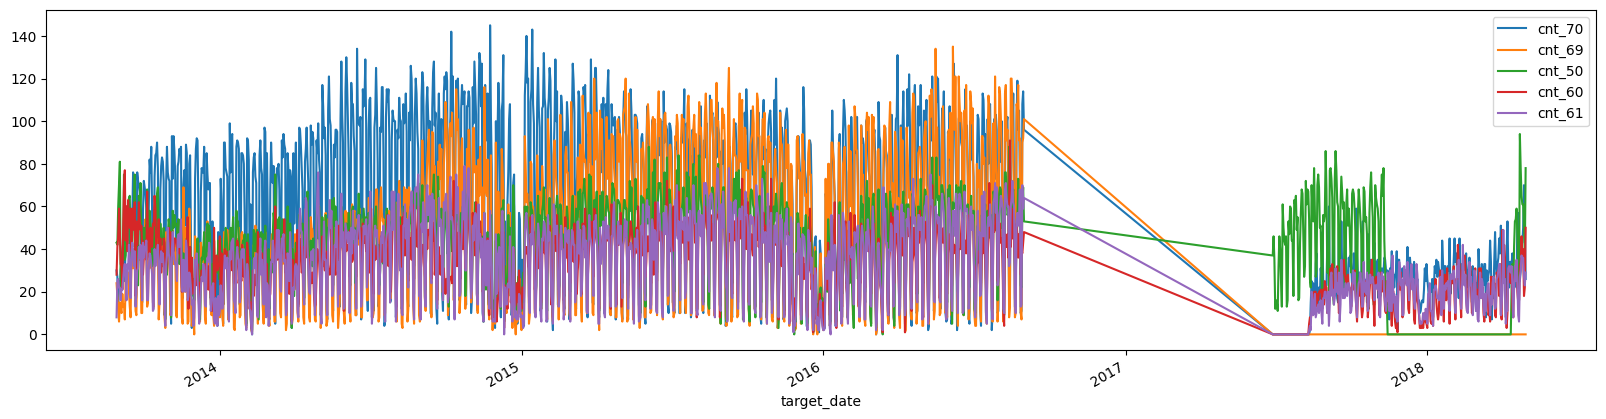

In [43]:
df_daily_bike_trip.sort_values(by='target_date', inplace=True)
df_daily_bike_trip.plot(x='target_date',figsize=(20,5))

In [19]:
df_daily_bike_trip[df_daily_bike_trip['target_date'] == pd.to_datetime('2016-09-01')]

,target_date,cnt_70,cnt_69,cnt_50,cnt_60,cnt_61


실제로 2016-09-01 부터 2017-06-27 간 자료가 비어있는 것을 알 수 있다. 그래프를 보아도, 특히 겨울철에는 이용이 급감하는 것을 알 수 있다. (온도 자료를 포함하면 더욱 재미있는 분석이 될 듯)

따라서, 위 내용에서 우리는 2013-08-29에서 2016-07-31 까지 자료를 기준으로 다변량 분석을 진행해 보고 결과를 확인해보자. 

In [49]:
import datetime
train_start=pd.to_datetime('2013-08-29')
train_end=pd.to_datetime('2016-07-31')
test_start=pd.to_datetime('2016-08-01')
test_end=pd.to_datetime('2016-08-30')
df_train_dataset = df_daily_bike_trip[(df_daily_bike_trip['target_date'] >= train_start) & (df_daily_bike_trip['target_date'] <= train_end)]
df_test_dataset = df_daily_bike_trip[(df_daily_bike_trip['target_date'] >= test_start) & (df_daily_bike_trip['target_date'] <= test_end)]

### 훈련 자료 준비

우리는 이미 위에서 분리된 자료 셋을 가지게 되었다. 해당 데이터셋을 BigQUery에 넣어보기로 하자.

우리는 쿼리를 이용해서 자료를 분리하는 방법을 이미 확인해 보았다. 

하지만, 여기에서는 이미 dataframe을 통해서 분리했기 때문에, 별도의 split 쿼리를 이용하지 않고, 직접 bigquery에 테이블을 생성하는 방식으로 진행한다. 


In [53]:
train_table_name = 'biketrip_train'
test_table_name = 'biketrip_test'

client.query(f'drop table if exists `{dataset_id}.{train_table_name}`')
client.query(f'drop table if exists `{dataset_id}.{test_table_name}`')

df_train_dataset.to_gbq(f'{dataset_id}.{train_table_name}', if_exists='replace')
df_test_dataset.to_gbq(f'{dataset_id}.{test_table_name}', if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 3679.21it/s]


In [30]:
df_train_dataset['target_date']

945     2013-08-29
958     2013-08-30
1264    2013-08-31
965     2013-09-01
531     2013-09-02
           ...    
325     2016-07-27
881     2016-07-28
331     2016-07-29
947     2016-07-30
1075    2016-07-31
Name: target_date, Length: 1068, dtype: dbdate

### Training

훈련 자료가 준비되었다, target label은 cnt_70으로 하고 ARIMA_EXTERNAL 알고리즘을 적용한다. 


In [54]:
model_name = "bike_count_model"
algorithm = "ARIMA_PLUS_XREG"
TIME_SERIES_TIMESTAMP_COL = "target_date" # 시간축 컬럼
TIME_SERIES_DATA_COL = "cnt_70" # 예측 대상 컬럼. 나머지 컴럼은 공변으로서만 의미가 있음.
AUTO_ARIMA = True
HOLIDAY_REGION = ['US']  # 미국 공유일 자료 이용
HORIZON = 30  ## 30 Point(여기서는 일자) 까지 예측

model_creation_query = client.query(f"""
create or replace model `{dataset_id}.{model_name}`
options
( model_type='{algorithm}', TIME_SERIES_TIMESTAMP_COL='{TIME_SERIES_TIMESTAMP_COL}', TIME_SERIES_DATA_COL='{TIME_SERIES_DATA_COL}', HORIZON={HORIZON}, HOLIDAY_REGION={HOLIDAY_REGION}, AUTO_ARIMA={AUTO_ARIMA}) 
as
select *
  from `{dataset_id}.{train_table_name}`""").to_dataframe()


### Evaluation

모델이 생성되었으면, ARIMA EVALUATION기능으로 성능 확인을 수행한다.

AUTO ARIMA로 설정되면, 초기 KPSS테스트로 나온 non_seasonal_d값 1여부에 따라, 42 또는 21개의 예상 모델을 동시에 훈련하여, 최적의 해를 찾는다.


In [56]:
client.query(f"""
SELECT
 *
FROM
 ML.ARIMA_EVALUATE(MODEL `{dataset_id}.{model_name}`)""").to_dataframe()
    

,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods,has_holiday_effect,has_spikes_and_dips,has_step_changes,error_message
0,0,1,5,True,-4044.447047,8102.894094,113.417854,[WEEKLY],True,False,False,
1,1,1,2,False,-4104.633584,8217.267168,128.310011,[WEEKLY],True,False,False,
2,1,1,2,True,-4103.791922,8217.583844,128.108738,[WEEKLY],True,False,False,
3,3,1,1,False,-4104.274598,8218.549196,128.224022,[WEEKLY],True,False,False,
4,2,1,2,False,-4104.341611,8218.683222,128.239910,[WEEKLY],True,False,False,
5,2,1,1,False,-4105.500723,8219.001446,128.517850,[WEEKLY],True,False,False,
6,2,1,3,False,-4103.876523,8219.753045,128.129697,[WEEKLY],True,False,False,
7,3,1,1,True,-4104.164448,8220.328897,128.196632,[WEEKLY],True,False,False,
8,4,1,1,True,-4103.199513,8220.399026,127.966318,[WEEKLY],True,False,False,
9,2,1,2,True,-4104.320960,8220.641920,128.234174,[WEEKLY],True,False,False,


In [57]:
client.query(f"""SELECT
 *
FROM
 ML.ARIMA_COEFFICIENTS(MODEL `{dataset_id}.{model_name}`)""").to_dataframe()


,ar_coefficients,ma_coefficients,intercept_or_drift,processed_input,weight,category_weights
0,[],[],NaN,cnt_69,0.560723,[]
1,[],[],NaN,cnt_50,0.167197,[]
2,[],[],NaN,cnt_60,-0.262964,[]
3,[],[],NaN,cnt_61,0.976986,[]
4,[],[],NaN,__INTERCEPT__,53.094651,[]
5,[],"[-0.919128570073461, -0.0760857567058069, 0.60...",-0.025546,None,NaN,[]


In [ ]:
일단, 이 해석을 보면, cnt_61, cnt_69가 많이 영향을 미친다. cnt_70에...

음 지도상으로 확인해 보기 위해, station_id값으로 이름을 확인한다.

In [60]:
client.query(f"""select distinct start_station_name ,start_station_id from `{ml_dataset}` where start_station_id in (70,61,69)""").to_dataframe()

,start_station_name,start_station_id
0,Central Ave at Fell St,70
1,Howard St at 8th St,61
2,2nd at Townsend,61
3,San Francisco Caltrain (Townsend at 4th),70
4,San Francisco Caltrain 2 (330 Townsend),69


오 3개가 모두 지근 거리에 있는 Station이었다!!! 

서로 연관이 있으므로 같이 분석을 하는게 의미가 있을 것 같다.

In [63]:
df_forecast = client.query(f"""
SELECT
*
FROM
ML.FORECAST(
MODEL `{dataset_id}.{model_name}`,
STRUCT(30 AS horizon, 0.8 AS confidence_level), 
(
  select * except ( {TIME_SERIES_DATA_COL} )
    from `{dataset_id}.{test_table_name}`
)
)""").to_dataframe()
    

In [70]:
df_forecast

,forecast_timestamp,forecast_value,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound
0,2016-08-01 00:00:00+00:00,97.528182,10.659432,0.8,83.859734,111.196629
1,2016-08-02 00:00:00+00:00,107.236447,10.695195,0.8,93.522141,120.950753
2,2016-08-03 00:00:00+00:00,120.576939,10.695283,0.8,106.862521,134.291357
3,2016-08-04 00:00:00+00:00,103.047903,12.523120,0.8,86.989674,119.106133
4,2016-08-05 00:00:00+00:00,85.221722,14.210070,0.8,67.000339,103.443104
5,2016-08-06 00:00:00+00:00,3.375390,14.234870,0.8,-14.877794,21.628574
6,2016-08-07 00:00:00+00:00,10.814218,14.259628,0.8,-7.470712,29.099149
7,2016-08-08 00:00:00+00:00,109.553658,14.284343,0.8,91.237036,127.870280
8,2016-08-09 00:00:00+00:00,126.059182,14.309015,0.8,107.710924,144.407441
9,2016-08-10 00:00:00+00:00,105.725704,14.333644,0.8,87.345863,124.105545


In [71]:
df_real = client.query(f"""
select target_date as forecast_timestamp, cnt_70 as real_cnt_70 from `{dataset_id}.{test_table_name}`""").to_dataframe()


In [72]:
df_forecast_comparison = pd.merge(df_forecast, df_real, on='forecast_timestamp', how='inner')

<Axes: xlabel='forecast_timestamp'>

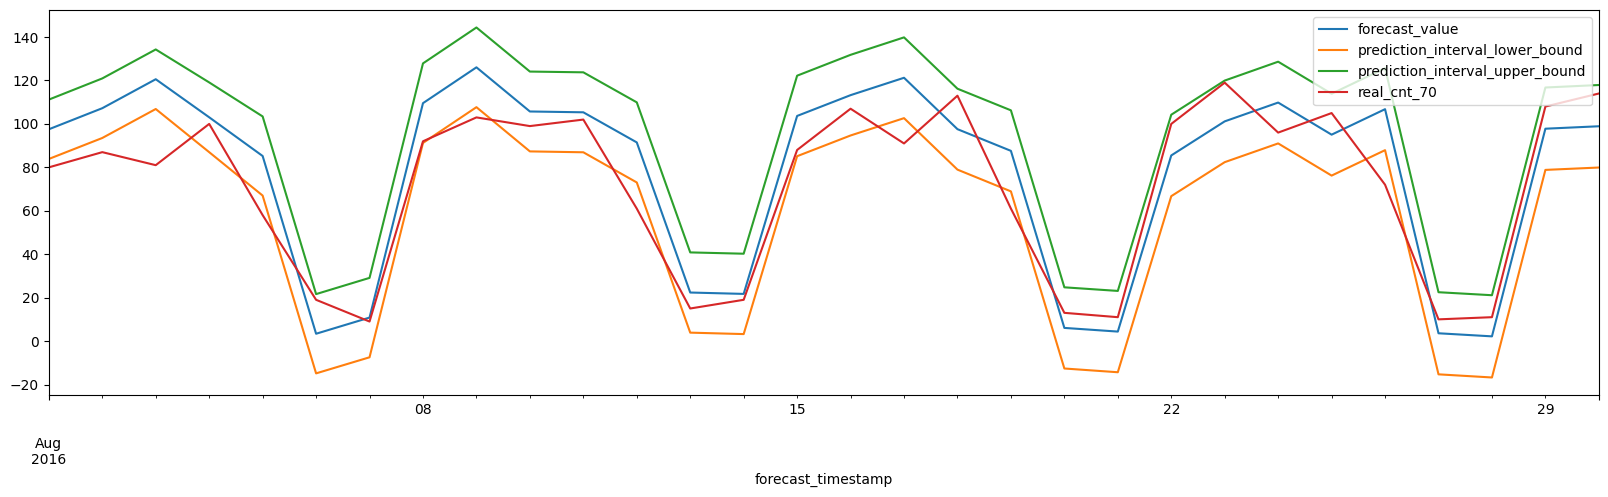

In [76]:
df_forecast_comparison[['forecast_timestamp', 'forecast_value', 'prediction_interval_lower_bound', 'prediction_interval_upper_bound', 'real_cnt_70']].plot(x='forecast_timestamp', figsize=(20,5))

이 모형은 실제로는 사용하기가 어렵다고 생각할 수 있다. 예를 들어, 해당 시점에서, 계수기(Counter)가 특정 지점(cnt_70)이 고장났다면 모를까. 나머지 4곳의 Count를 모두 알고 1곳의 카운트를 모르는 경우는 많지 않을 것이다. 

**하지만, 실제로는 적용영역이 많다.**. 예를 들면, 백화점에서 자동차 카운트는 매우 간단하고 자동적으로 카운팅이 된다. 하지만 실제 고객응대를 맞고 있는 백화점 직원들은 실제 구매 고객이 얼마가 될지 필요한 충원인원이 얼마가 될지 잘 모른다. 

하루가 지나가고, 구매고객 또는 정문에서 카운팅한 내방 고객 전체에 대한 통계치는 구할 수 있겠지만, 실시간으로 대응하기가 어려울 수 있다. 이 경우에, 내방고객을 타겟 변수로, 나머지 실시간으로 추출가능한 추차대수, 날씨 온도, 이벤트 여부등을 이용하며, 내방 고객을 예측하고, 인력 충원 계획을 잡을 수 있다. 

## **Image Classification**

### fabric defect dataset

https://www.kaggle.com/datasets/rmshashi/fabric-defect-dataset

## **Online Prediction** (Optional)

BQML의 장점은 만들어진 모델에 대해서, 별도의 큰 파이프라인 작업 없이, 바로 Online Endpoint구성이 가능하다는 점이다. 

**(중요)** 아마 Vertex AI Model Registry에 대한 접근 권한이 없을 수 있으며, 그럴경우 Permission 오류가 뜬다. 해당 내용은 Optional이므로 Permission 구성 후 다시 수행해야 합니다.


먼저, BQML에서 만들어진 모델을 Vertex AI Model Registry에 등록해 보자. 

순서는

1. Vertex AI Registry 등록
2. Endpoint 구성
3. Endpoint 에 모델 배포
4. Online Prediction
5. 배포된 모델 삭제
6. Endpoint 삭제

형태로 진행해 본다.


In [80]:
# 위에서 펭귄 회귀모델, 분류 모델을 삭제하지 않았다면, 바로 아래 내용을 수행하고, 삭제하였다면, 다시 한번 모델 생성까지 수행한다.
### Vertex AI Registry 등록

model_name = 'penguin_regression_model'


client.query(f"""
ALTER MODEL `{dataset_id}.{model_name}` SET OPTIONS (vertex_ai_model_id="{model_name}")""").to_dataframe()

""


In [81]:
# Endpoint 구성
import google.cloud.aiplatform as vertex_ai
vertex_ai.init(location=location)


In [ ]:
### Endpoint 생성

model = vertex_ai.Model(model_name=model_name)

ENDPOINT_NAME = f"{model_name}-endpoint" 

endpoint = vertex_ai.Endpoint.create(
    display_name=ENDPOINT_NAME
)

print("Endpoint display name:", endpoint.display_name)
print("Endpoint resource name:", endpoint.resource_name)


In [88]:
### 모델 배포
# 생각보다 배포 시간이 많이 걸린다. 10~20분 정도... 아래 내용 실행하고 커피 한잔 

model.deploy(endpoint=endpoint)

In [89]:
### Online Prediction
# 배포가 다 되었다. 실제 호출을 해 보면 된다. 먼저 호출 자료를 Test자료로 가지고 오자. 
import json

ml_dataset = f'{mldataset_id}.penguins'

test_table_name = 'penguin_test'



In [92]:
df_penguin_test = client.query(f"""
select * except (body_mass_g)
  from `{dataset_id}.{test_table_name}` limit 2
""").to_dataframe()

df_json_format = json.loads(df_penguin_test.to_json(orient='records'))


In [93]:
prediction = endpoint.predict(df_json_format)

print(prediction)

Prediction(predictions=[5349.05419921875, 4775.0322265625], deployed_model_id='1319616263470710784', model_version_id='1', model_resource_name='projects/547505032058/locations/asia-northeast3/models/penguin_regression_model', explanations=None)


온라인 호출이 성공되었습니다 !!

BQML에서 쿼리로 생성한 모델을 ALTER MODEL로 Vertex AI Model Registry에 등록(여기서도 좀 시간 걸림). 이후 Model Registry에 Endpoint 생성하고, 해당 엔드포인트에 모델 배포
Online Prediction도 잘 되는 것을 확인하였습니다.


In [94]:
### 모델 Undeployment
endpoint.undeploy_all()

resource name: projects/547505032058/locations/asia-northeast3/endpoints/383676781535690752

In [95]:
### 엔드 포인트 삭제
endpoint.delete()


Deleting Endpoint : projects/547505032058/locations/asia-northeast3/endpoints/383676781535690752
Delete Endpoint  backing LRO: projects/547505032058/locations/asia-northeast3/operations/1251294809943965696
Endpoint deleted. . Resource name: projects/547505032058/locations/asia-northeast3/endpoints/383676781535690752


In [96]:
### BQML 관련 자료셋 클리어. BQML로 등록된 모델은 BQ에서 작업하면 자동으로 Vertex AI Registry에서 사라짐.
client.query(f"""
drop model if exists `{dataset_id}.{model_name}`""").to_dataframe()
client.query(f"""
drop table if exists `{dataset_id}.{train_table_name}`""").to_dataframe()
client.query(f"""
drop table if exists `{dataset_id}.{test_table_name}`""").to_dataframe()
    

""
